In [6]:
from utils import *
import torch
import torch.utils.data
from model_architectures import SaliencyModel
from model_architectures import SaliencyModelHolesFCL
from model_architectures import SaliencyModelHolesConv
from collections import OrderedDict
from scipy.misc import imresize
from scipy.ndimage import imread
import matplotlib.pyplot as plt

In [9]:
# Load Model

device = torch.device('cpu')
model = SaliencyModelHolesFCL()
state_dict = torch.load('holefcl-128/saved_models/train_model_latest', map_location=device)

temp_state_dict = state_dict['network']
new_state_dict = OrderedDict()

for k, v in temp_state_dict.items():
    name = k[6:] # remove `network.`
    new_state_dict[name] = v
model.load_state_dict(new_state_dict)

In [12]:
# Load Data

imgs_128 = load_array('images_128')
#imgs_64 = load_array('images_64')
#imgs_32 = load_array('images_32')

testset_128 = imgs_128[84000:]
#testset_64 = imgs_64[84000:]
#testset_32 = imgs_32[84000:]

testset_128 = np.expand_dims(testset_128, axis=1)
#testset_64 = np.expand_dims(testset_64, axis=1)
#testset_32 = np.expand_dims(testset_32, axis=1)

test_data_128 = torch.utils.data.DataLoader(testset_128, batch_size=1, shuffle=False ,num_workers=2)
#test_data_64 = torch.utils.data.DataLoader(testset_64, batch_size=1, shuffle=False ,num_workers=2)
#test_data_32 = torch.utils.data.DataLoader(testset_32, batch_size=1, shuffle=False ,num_workers=2)
#58, 45, 33, 12


In [140]:
model.train()
ps = 8
error_maps = []
counter = 0
for x in test_data_128:
    error_map = np.zeros((128, 128))
    for i in range(ps, 128-ps, ps//2):
        for j in range(ps, 128-ps, ps//2):
            mask = np.ones((x.shape[2], x.shape[3]))
            mask[i-(ps//2):i+(ps//2), j-(ps//2):j+(ps//2)] = 0
            
            new_x = np.array(x, copy=True)
            y = x[0, 0, i-(ps//2):i+(ps//2), j-(ps//2):j+(ps//2)]
            new_x[0, 0, i-(ps//2):i+(ps//2), j-(ps//2):j+(ps//2)] = 0
            
            # x = np.expand_dims(np.expand_dims(x, axis=0), axis=0)
            new_x = torch.tensor(new_x).float()

            out = model.forward(new_x)
            out = out.detach().numpy()
            y = y.detach().numpy()
            
            error = abs(normalise(out[0]) - normalise(y))
            error_map[i-(ps//2):i+(ps//2), j-(ps//2):j+(ps//2)] += error
        
    error_maps.append(error_map)
    counter += 1
    if (counter == 100):
        break
            

In [141]:
test_data_128_list = []
for x in test_data_128:
    test_data_128_list.append(x)

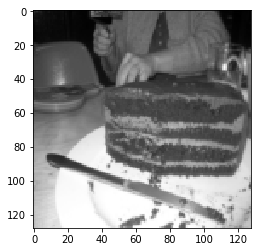

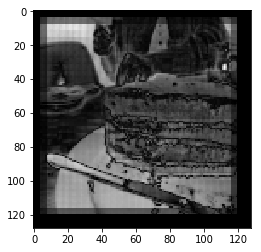

In [146]:
plt.gray()
plt.imshow(test_data_128_list[44][0][0])
plt.show()
plt.imshow(error_maps[44])
plt.show()

In [130]:
model.eval()
test_data2 = []
img1 = imresize(imread('popout/popout1.png', mode='L'), (128,128))
img2 = imresize(imread('popout/popout2.jpg', mode='L'), (128,128))
img3 = imresize(imread('popout/popout3.jpg', mode='L'), (128,128))
test_data2.append(img1)
test_data2.append(img2)
test_data2.append(img3)

/anaconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
/anaconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecate

In [131]:
ps = 8
error_maps = []
counter = 0
for x in test_data2:
    error_map = np.zeros((128, 128))
    for i in range(ps, 128-ps, ps//2):
        for j in range(ps, 128-ps, ps//2):
            mask = np.ones((x.shape[0], x.shape[1]))
            mask[i-(ps//2):i+(ps//2), j-(ps//2):j+(ps//2)] = 0
        
            new_x = np.array(x, copy=True)
            y = x[i-(ps//2):i+(ps//2), j-(ps//2):j+(ps//2)]
            new_x[i-(ps//2):i+(ps//2), j-(ps//2):j+(ps//2)] = 0
            
            new_x = np.expand_dims(np.expand_dims(new_x, axis=0), axis=0)
            new_x = torch.tensor(new_x).float()

            out = model.forward(new_x)
            out = out.detach().numpy()
            #y = y.detach().numpy()
            
            error = abs(normalise(out[0]) - normalise(y))
            error_map[i-(ps//2):i+(ps//2), j-(ps//2):j+(ps//2)] += error
        
    error_maps.append(error_map)

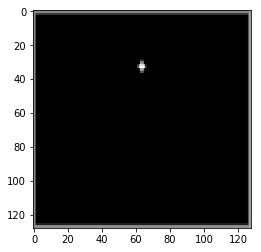

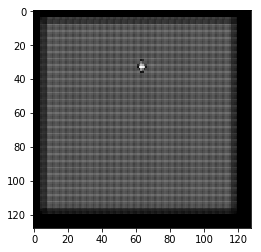

10026


In [134]:
plt.gray()
plt.imshow(test_data2[0])
plt.show()
plt.imshow(error_maps[0])
plt.show()
print(np.argmax(error_maps[2]))

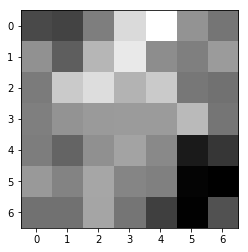

In [129]:
plt.imshow(model.encoder[0].weight[29][0].detach().numpy())
plt.show()